In [1]:
import numpy as np
import torch
import torch.nn as nn

# add parent dict to path
import os, sys
sys.path.append(os.path.abspath(".."))
from src import treenode as tn

In [2]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, classification=False):
        super(NeuralNet, self).__init__()
        self.hidden_sizes = hidden_sizes

        for i in range(len(hidden_sizes)):
            layer_name = f"l{i + 1}"
            relu_name = f"relu{i + 1}"
            if i == 0:
                setattr(self, layer_name, nn.Linear(input_size, hidden_sizes[i]))
                setattr(self, relu_name, nn.ReLU())
            else:
                setattr(
                    self, layer_name, nn.Linear(hidden_sizes[i - 1], hidden_sizes[i])
                )
                setattr(self, relu_name, nn.ReLU())

        output_layer_name = f"l{len(hidden_sizes) + 1}"

        setattr(self, output_layer_name, nn.Linear(hidden_sizes[-1], num_classes))
        # setattr(self, "output_activation", nn.Softmax(dim=num_classes - 1) if classification else nn.Identity())
        
    def forward(self, x):
        out = x
        for i in range(len(self.hidden_sizes)):
            layer_name = f"l{i + 1}"
            relu_name = f"relu{i + 1}"
            out = getattr(self, layer_name)(out)
            out = getattr(self, relu_name)(out)

        output_layer_name = f"l{len(self.hidden_sizes) + 1}"
        out = getattr(self, output_layer_name)(out)
        # out = getattr(self, "output_activation")(out)
        # if len(out.shape) == 1:
        #     out = out.unsqueeze(0)
        # elif len(out.shape) == 2 and out.shape[0] == 1:
        #     out = out.squeeze(0)
        # elif len(out.shape) == 3 and out.shape[0] == 1:
        #     out = out.squeeze(0)
        return out

In [3]:
# Make model
model = NeuralNet(input_size=2, num_classes=1, hidden_sizes=[2,4,3])
tree = tn.RegionTree(model.state_dict())
tree.build_tree()
root = tree.get_root()
print("Tree built successfully")


Processing Layer 1/4: 4it [00:00, 7200.52it/s]
Processing Layer 2/4: 16it [00:00, 3047.22it/s]
Processing Layer 3/4: 8it [00:00, 380.00it/s]
Processing Layer 4/4: 2it [00:00, 60.48it/s]

Tree built successfully


In [4]:
# some two dimensional inputs
inputs = np.random.rand(10000, 2) * 10 - 5  # Random inputs in range [-5, 5]
print(inputs)

[[-0.71824671 -1.0058495 ]
 [-0.76537668 -2.96497127]
 [ 4.12075947 -4.6242829 ]
 ...
 [ 3.36801354  1.66256501]
 [-0.33569782  4.23788   ]
 [ 2.86552098 -1.93049967]]


In [5]:
from tqdm import tqdm
# test_path = tree.pass_input_through_tree(inputs[0], return_path=True)
# tree.reset_counters()
tree.reset_counters()
for input in tqdm(inputs):
    tree.pass_input_through_tree(input)
    

100%|██████████| 10000/10000 [00:00<00:00, 11676.20it/s]


In [6]:
tree.read_off_counters()

Layer 0: [10000]
Total: 10000

Layer 1: [4156, 2459, 2248, 1137]
Total: 10000

Layer 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 4156, 0, 0, 0, 0, 0, 0, 1627, 0, 0, 0, 0, 0, 0, 0, 273, 559, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 614, 1634, 0, 0, 0, 0, 0, 0, 196, 0, 0, 0, 0, 0, 0, 0, 846, 95, 0, 0, 0, 0, 0, 0]
Total: 10000

Layer 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 273, 0, 0, 0, 0, 0, 0, 0, 559, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
# Read .pth file
# model_path = "../models/simple_mlp.pth"
state_dicts = {}
for filename in os.listdir("../state_dicts/"):
    if filename.endswith(".pth"):
        model_name = filename[:-4]  # Remove .pth extension
        epoch = model_name[5:]  # Extract epoch number
        # print(f"Loading model from {model_name}")
        state_dicts[epoch] = torch.load(os.path.join("../state_dicts/", filename))
        

In [8]:
# # Create trees for each epoch
# trees = {}
# for epoch, state_dict in state_dicts.items():
#     tree = tn.RegionTree(state_dict)
#     tree.build_tree()
#     trees[epoch] = tree
#     print(f"Tree for epoch {epoch} built successfully")

tree = tn.RegionTree(state_dicts['0'])
tree.build_tree()
# state_dicts

Processing Layer 1/7: 8it [00:00, 8546.72it/s]
Processing Layer 2/7: 8it [00:00, 1649.84it/s]
Processing Layer 3/7: 8it [00:00, 479.16it/s]
Processing Layer 4/7: 8it [00:00, 60.49it/s]
Processing Layer 5/7: 8it [00:00,  8.34it/s]
Processing Layer 6/7: 8it [00:05,  1.59it/s]
Processing Layer 7/7: 2it [00:09,  4.77s/it]


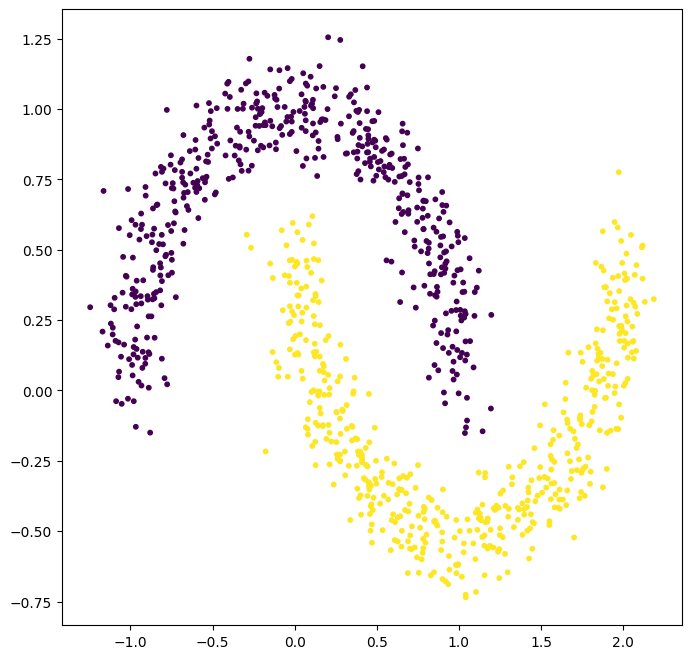

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Data to generate regions
X_train, y_train = make_moons(n_samples=1000, noise=0.1, random_state=123)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=10)
# ax.scatter(X_test[:,0], X_test[:,1], c="r", s=1)

In [10]:
X = np.array(X_train)

In [11]:
# counters = {}
# for epoch, tree in trees.items():
#     for x in X:
#         tree.pass_input_through_tree(x)
#     counters[epoch] = tree.get_counters()
    


In [12]:
# import pandas as pd

# counter_frame = pd.DataFrame.from_dict(counters)
# counter_frame.to_pickle("../dataframes/test_counters.pkl")

In [13]:
# epochs = sorted(counter_frame.keys())

# for epoch in epochs:
#     for layer_idx, layer_counters in enumerate(counter_frame[epoch]):
#             print(f"Layer {layer_idx}: {layer_counters}\nTotal: {sum(layer_counters)}\n")

## Mutual information


\begin{align}
    \hat{I}(X;Y) &= \sum_k\sum_{k'}p_{kk'}\log{\left( \frac{p_{kk'}}{p_kp_{k'}} \right)} = \sum_k\sum_{k'} \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\left( \frac{\frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}}{\frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k}\frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}}}  \right)} \nonumber \\
    &= \frac{1}{|\mathcal{D}_X||\mathcal{D}_Y|}\sum_k\sum_{k'} \frac{n_{kk'}}{\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\frac{n_{kk'}}{n^X_kn^Y_{k'}}} \approx \sum_k\sum_{k'} \frac{n_{kk'}}{N}\log{\frac{Nn_{kk'}}{n^X_kn^Y_{k'}}}.
\end{align}
where:
* $n_{kk'}$ is the number of points of class $k'$ in polytope $k$
* $n_k^X$ is the total number of points in polytope $k$
* $n_{k'}^Y$ is the total number of points in class $k'$.
* $N$ is the total number of data points.

In [14]:
class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1]

n0Y = len(class0)
n1Y = len(class1)

N = n0Y + n1Y

In [15]:
from dataclasses import dataclass

@dataclass
class Region:
    layer:int
    activation:list
    number_counts:list    

In [16]:
def get_nodes_info(node_dict):
    info = {}
    for layer, nodes in node_dict.items():
        counters = [node.counter for node in nodes]
        info[layer] = counters
        # print(f"Layer: {layer}, {counters}\nTotal: {sum(counters)}\n")
    return info

In [17]:
for input in np.array(class0):
    tree.pass_input_through_tree(input)
tree.store_counters()
for input in np.array(class1):
    tree.pass_input_through_tree(input)
tree.store_counters()

number_counts = tree.get_number_counts()

In [18]:
for layer, counters in number_counts.items():
    counter_array = np.array(counters)
    print(f"Layer: {layer}: Sum of class 1: {np.sum(counter_array[:,0])}, sum of class 2 {np.sum(counter_array[:,1])}")

Layer: 0: Sum of class 1: 500, sum of class 2 500
Layer: 1: Sum of class 1: 500, sum of class 2 500
Layer: 2: Sum of class 1: 500, sum of class 2 500
Layer: 3: Sum of class 1: 500, sum of class 2 500
Layer: 4: Sum of class 1: 500, sum of class 2 500
Layer: 5: Sum of class 1: 500, sum of class 2 500
Layer: 6: Sum of class 1: 500, sum of class 2 500
Layer: 7: Sum of class 1: 500, sum of class 2 500


\begin{align}
    \hat{I}(X;Y) &= \sum_k\sum_{k'}p_{kk'}\log{\left( \frac{p_{kk'}}{p_kp_{k'}} \right)} = \sum_k\sum_{k'} \frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\left( \frac{\frac{n_{kk'}}{|\mathcal{D}_X||\mathcal{D}_Y|\mathcal{V}^X_k\mathcal{V}^Y_{k'}}}{\frac{n^X_k}{|\mathcal{D}_X|\mathcal{V}^X_k}\frac{n^Y_{k'}}{|\mathcal{D}_Y|\mathcal{V}^Y_{k'}}}  \right)} \nonumber \\
    &= \frac{1}{|\mathcal{D}_X||\mathcal{D}_Y|}\sum_k\sum_{k'} \frac{n_{kk'}}{\mathcal{V}^X_k\mathcal{V}^Y_{k'}}\log{\frac{n_{kk'}}{n^X_kn^Y_{k'}}} \approx \sum_k\sum_{k'} \frac{n_{kk'}}{N}\log{\frac{Nn_{kk'}}{n^X_kn^Y_{k'}}}.
\end{align}
where:
* $n_{kk'}$ is the number of points of class $k'$ in polytope $k$
* $n_k^X$ is the total number of points in polytope $k$
* $n_{k'}^Y$ is the total number of points in class $k'$.
* $N$ is the total number of data points.

In [19]:
def calc_MI_from_number_counts(number_counts):
    MI_layer = {}
    for layer, layer_counts in number_counts.items():
        MI = 0
        for region_counts in layer_counts:
            nk0 = region_counts[0] # Class 0 points in region
            nk1 = region_counts[1] # Class 1 points in region
            nkX = nk0 + nk1 # Sum. Total number of points in region.

            term1 = (nk0 / N) * np.log(N*nk0/(nkX*n0Y)) if nk0 > 1e-5 else 0
            term2 = (nk1 / N) * np.log(N*nk1/(nkX*n1Y)) if nk1 > 1e-5 else 0
            
            MI += (term1+term2)
        MI_layer[layer] = MI
    # print(MI_layer)
    return MI_layer

In [20]:
# calc_MI_from_number_counts(number_counts)

In [21]:
# Function to calculate the mutual information for each layer
def calc_MI(local_state_dict):
    # Create and build tree from state dict
    tree = tn.RegionTree(local_state_dict)
    tree.build_tree()
    
    # Run class 0 data through and store number counts
    tree.reset_counters()
    for input in tqdm(np.array(class0)):
        tree.pass_input_through_tree(input)
    tree.store_counters(reset=True)
    
    # Run class 1 data through ad store number counts
    for input in tqdm(np.array(class1)):
        tree.pass_input_through_tree(input)
    tree.store_counters(reset=True)
    
    # Extract number counts of non-zero nodes
    number_counts = tree.get_number_counts()
    print(number_counts)
    # 
    # Estimate mutual information:
    local_MI = calc_MI_from_number_counts(number_counts)
    print(local_MI)
    return local_MI

In [22]:
# calc_MI(state_dicts["6000"])

In [23]:
epochs = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 14999]

MI_pr_epoch = {}
for epoch in epochs:
    state_dict = state_dicts[f"{epoch}"]
    MI_pr_epoch[epoch] = calc_MI(state_dict)
    

Processing Layer 1/7: 8it [00:00, 8142.30it/s]
Processing Layer 2/7: 8it [00:00, 1601.11it/s]
Processing Layer 3/7: 8it [00:00, 358.17it/s]
Processing Layer 4/7: 8it [00:00, 52.93it/s]
Processing Layer 5/7: 8it [00:01,  7.82it/s]
Processing Layer 6/7: 8it [00:06,  1.33it/s]
Processing Layer 7/7: 2it [00:09,  4.83s/it]
100%|██████████| 500/500 [00:00<00:00, 5798.57it/s]


{0: [[500, 500]], 1: [[70, 0], [143, 76], [7, 0], [237, 0], [2, 0], [41, 424]], 2: [[70, 0], [0, 12], [143, 64], [7, 0], [237, 0], [2, 0], [6, 302], [35, 122]], 3: [[70, 0], [0, 12], [143, 64], [7, 0], [237, 0], [2, 0], [0, 151], [6, 151], [35, 122]], 4: [[70, 0], [0, 12], [10, 16], [133, 48], [7, 0], [104, 0], [133, 0], [2, 0], [0, 151], [6, 151], [0, 6], [35, 116]], 5: [[70, 0], [0, 12], [10, 16], [39, 48], [94, 0], [7, 0], [104, 0], [125, 0], [8, 0], [2, 0], [0, 151], [0, 49], [6, 102], [0, 6], [12, 116], [23, 0]], 6: [[70, 0], [0, 12], [10, 16], [39, 48], [94, 0], [7, 0], [104, 0], [125, 0], [8, 0], [2, 0], [0, 151], [0, 49], [6, 102], [0, 6], [12, 116], [23, 0]], 7: [[70, 0], [0, 12], [10, 16], [39, 48], [94, 0], [7, 0], [104, 0], [125, 0], [8, 0], [2, 0], [0, 151], [0, 49], [6, 102], [0, 6], [12, 116], [23, 0]]}
{0: np.float64(0.0), 1: np.float64(0.41305903387416554), 2: np.float64(0.45225563089282006), 3: np.float64(0.45635606872083956), 4: np.float64(0.463903670671273), 5: np.f

Processing Layer 1/7: 8it [00:00, 10869.59it/s]
Processing Layer 2/7: 8it [00:00, 3336.43it/s]
Processing Layer 3/7: 8it [00:00, 52.25it/s]
Processing Layer 4/7: 8it [00:00, 60.20it/s]
Processing Layer 5/7: 8it [00:00,  8.05it/s]
Processing Layer 6/7: 8it [00:05,  1.36it/s]
Processing Layer 7/7: 2it [00:09,  4.79s/it]
100%|██████████| 500/500 [00:00<00:00, 6026.68it/s]


{0: [[500, 500]], 1: [[70, 0], [141, 75], [8, 0], [238, 0], [2, 0], [41, 425]], 2: [[70, 0], [0, 11], [141, 64], [8, 0], [238, 0], [2, 0], [6, 302], [35, 123]], 3: [[70, 0], [0, 11], [141, 64], [8, 0], [238, 0], [2, 0], [0, 151], [6, 151], [35, 123]], 4: [[70, 0], [0, 11], [10, 37], [131, 27], [8, 0], [127, 0], [111, 0], [2, 0], [0, 151], [6, 151], [0, 18], [35, 105]], 5: [[70, 0], [0, 7], [0, 4], [10, 37], [131, 27], [8, 0], [127, 0], [111, 0], [2, 0], [0, 148], [0, 3], [6, 151], [0, 18], [35, 105]], 6: [[70, 0], [0, 7], [0, 4], [10, 37], [131, 27], [8, 0], [127, 0], [111, 0], [2, 0], [0, 148], [0, 3], [6, 151], [0, 18], [35, 105]], 7: [[70, 0], [0, 7], [0, 4], [10, 37], [131, 27], [8, 0], [127, 0], [111, 0], [2, 0], [0, 148], [0, 3], [6, 151], [0, 18], [35, 105]]}
{0: np.float64(0.0), 1: np.float64(0.41487764358391344), 2: np.float64(0.45274842226630646), 3: np.float64(0.45684886009432596), 4: np.float64(0.4923707869686606), 5: np.float64(0.4923707869686606), 6: np.float64(0.49237078

Processing Layer 1/7: 8it [00:00, 17137.09it/s]
Processing Layer 2/7: 8it [00:00, 3916.71it/s]
Processing Layer 3/7: 8it [00:00, 54.92it/s]
Processing Layer 4/7: 8it [00:00, 55.00it/s]
Processing Layer 5/7: 8it [00:00,  8.03it/s]
Processing Layer 6/7: 8it [00:05,  1.36it/s]
Processing Layer 7/7: 2it [00:10,  5.07s/it]
100%|██████████| 500/500 [00:00<00:00, 5997.69it/s]


{0: [[500, 500]], 1: [[72, 0], [130, 71], [9, 0], [242, 0], [2, 0], [45, 429]], 2: [[72, 0], [0, 10], [130, 61], [9, 0], [242, 0], [2, 0], [6, 300], [39, 129]], 3: [[72, 0], [0, 10], [130, 61], [9, 0], [242, 0], [2, 0], [0, 143], [6, 157], [39, 129]], 4: [[72, 0], [0, 10], [7, 58], [123, 3], [9, 0], [156, 0], [86, 0], [2, 0], [0, 143], [6, 157], [0, 44], [39, 85]], 5: [[72, 0], [0, 8], [0, 2], [7, 58], [123, 3], [9, 0], [156, 0], [86, 0], [2, 0], [0, 141], [0, 2], [6, 157], [0, 44], [39, 85]], 6: [[72, 0], [0, 2], [0, 6], [0, 2], [7, 58], [123, 3], [9, 0], [156, 0], [86, 0], [2, 0], [0, 13], [0, 128], [0, 2], [6, 157], [0, 44], [39, 85]], 7: [[72, 0], [0, 2], [0, 6], [0, 2], [7, 58], [123, 3], [9, 0], [156, 0], [86, 0], [2, 0], [0, 13], [0, 128], [0, 2], [6, 157], [0, 44], [39, 85]]}
{0: np.float64(0.0), 1: np.float64(0.4138652036455476), 2: np.float64(0.4529427539136012), 3: np.float64(0.4567743614223515), 4: np.float64(0.5538512783619929), 5: np.float64(0.5538512783619928), 6: np.flo

Processing Layer 1/7: 8it [00:00, 30366.00it/s]
Processing Layer 2/7: 8it [00:00, 3094.57it/s]
Processing Layer 3/7: 8it [00:00, 923.58it/s]
Processing Layer 4/7: 8it [00:00, 106.68it/s]
Processing Layer 5/7: 8it [00:00, 13.80it/s]
Processing Layer 6/7: 8it [00:05,  1.45it/s]
Processing Layer 7/7: 2it [00:08,  4.42s/it]
100%|██████████| 500/500 [00:00<00:00, 9717.22it/s]


{0: [[500, 500]], 1: [[72, 0], [123, 68], [15, 0], [243, 0], [2, 0], [45, 432]], 2: [[72, 0], [0, 8], [123, 60], [15, 0], [243, 0], [2, 0], [6, 301], [39, 131]], 3: [[72, 0], [0, 8], [123, 60], [15, 0], [243, 0], [2, 0], [0, 129], [6, 172], [39, 131]], 4: [[72, 0], [0, 8], [2, 60], [121, 0], [15, 0], [193, 0], [50, 0], [2, 0], [0, 129], [6, 172], [0, 69], [39, 62]], 5: [[72, 0], [0, 7], [0, 1], [2, 60], [121, 0], [15, 0], [193, 0], [50, 0], [2, 0], [0, 127], [0, 2], [6, 172], [0, 69], [39, 62]], 6: [[72, 0], [0, 7], [0, 1], [2, 60], [121, 0], [15, 0], [193, 0], [50, 0], [2, 0], [0, 8], [0, 119], [0, 2], [6, 172], [0, 69], [39, 62]], 7: [[72, 0], [0, 7], [0, 1], [2, 60], [121, 0], [15, 0], [193, 0], [50, 0], [2, 0], [0, 8], [0, 119], [0, 2], [4, 67], [2, 105], [0, 69], [39, 62]]}
{0: np.float64(0.0), 1: np.float64(0.4197424554732029), 2: np.float64(0.4562630712694716), 3: np.float64(0.45957671814925233), 4: np.float64(0.5907080155277714), 5: np.float64(0.5907080155277714), 6: np.float64

Processing Layer 1/7: 8it [00:00, 35394.97it/s]
Processing Layer 2/7: 8it [00:00, 7498.20it/s]
Processing Layer 3/7: 8it [00:00, 87.79it/s]
Processing Layer 4/7: 8it [00:00, 117.34it/s]
Processing Layer 5/7: 8it [00:01,  5.08it/s]
Processing Layer 6/7: 8it [00:04,  1.64it/s]
Processing Layer 7/7: 2it [00:09,  4.52s/it]
100%|██████████| 500/500 [00:00<00:00, 9736.13it/s]


{0: [[500, 500]], 1: [[70, 0], [115, 63], [22, 0], [245, 0], [2, 0], [46, 437]], 2: [[70, 0], [0, 6], [115, 57], [22, 0], [245, 0], [2, 0], [5, 299], [41, 138]], 3: [[70, 0], [0, 6], [115, 57], [22, 0], [245, 0], [2, 0], [0, 117], [5, 182], [41, 138]], 4: [[70, 0], [0, 6], [9, 57], [106, 0], [22, 0], [218, 0], [27, 0], [2, 0], [0, 117], [5, 182], [0, 94], [41, 44]], 5: [[70, 0], [0, 5], [0, 1], [9, 57], [106, 0], [22, 0], [218, 0], [27, 0], [2, 0], [0, 115], [0, 2], [5, 182], [0, 94], [41, 44]], 6: [[70, 0], [0, 5], [0, 1], [9, 57], [106, 0], [22, 0], [218, 0], [27, 0], [2, 0], [0, 5], [0, 110], [0, 2], [5, 182], [0, 94], [41, 44]], 7: [[70, 0], [0, 5], [0, 1], [0, 56], [9, 1], [106, 0], [22, 0], [161, 0], [57, 0], [27, 0], [2, 0], [0, 5], [0, 110], [0, 2], [5, 182], [0, 51], [0, 43], [41, 44]]}
{0: np.float64(0.0), 1: np.float64(0.42557465791347315), 2: np.float64(0.4620780483959445), 3: np.float64(0.4645337468757898), 4: np.float64(0.5849534481327393), 5: np.float64(0.584953448132739

Processing Layer 1/7: 8it [00:00, 9995.36it/s]
Processing Layer 2/7: 8it [00:00, 6626.07it/s]
Processing Layer 3/7: 8it [00:00, 90.31it/s]
Processing Layer 4/7: 8it [00:00, 111.02it/s]
Processing Layer 5/7: 8it [00:00, 13.92it/s]
Processing Layer 6/7: 8it [00:05,  1.45it/s]
Processing Layer 7/7: 2it [00:09,  4.76s/it]
100%|██████████| 500/500 [00:00<00:00, 10094.59it/s]


{0: [[500, 500]], 1: [[66, 0], [105, 62], [31, 0], [249, 0], [2, 0], [47, 438]], 2: [[66, 0], [0, 5], [105, 57], [31, 0], [249, 0], [2, 0], [5, 297], [42, 141]], 3: [[66, 0], [0, 4], [0, 1], [105, 57], [31, 0], [249, 0], [2, 0], [0, 99], [5, 198], [42, 141]], 4: [[66, 0], [0, 4], [0, 1], [90, 57], [15, 0], [31, 0], [249, 0], [2, 0], [0, 99], [5, 198], [17, 125], [25, 16]], 5: [[66, 0], [0, 4], [0, 1], [90, 57], [15, 0], [31, 0], [249, 0], [2, 0], [0, 95], [0, 4], [5, 198], [17, 125], [25, 16]], 6: [[66, 0], [0, 4], [0, 1], [90, 57], [15, 0], [31, 0], [249, 0], [2, 0], [0, 9], [0, 86], [0, 3], [0, 1], [5, 198], [17, 125], [25, 16]], 7: [[66, 0], [0, 4], [0, 1], [0, 50], [90, 7], [15, 0], [31, 0], [151, 0], [98, 0], [2, 0], [0, 9], [0, 86], [0, 3], [0, 1], [5, 198], [0, 30], [17, 95], [25, 16]]}
{0: np.float64(0.0), 1: np.float64(0.4286469904462596), 2: np.float64(0.4640343113660132), 3: np.float64(0.4660408837208572), 4: np.float64(0.49208689306899916), 5: np.float64(0.49208689306899916

Processing Layer 1/7: 8it [00:00, 33189.35it/s]
Processing Layer 2/7: 8it [00:00, 98.85it/s]
Processing Layer 3/7: 8it [00:00, 963.35it/s]
Processing Layer 4/7: 8it [00:00, 113.22it/s]
Processing Layer 5/7: 8it [00:00, 14.02it/s]
Processing Layer 6/7: 8it [00:04,  1.76it/s]
Processing Layer 7/7: 2it [00:09,  4.96s/it]
100%|██████████| 500/500 [00:00<00:00, 9150.20it/s]


{0: [[500, 500]], 1: [[56, 0], [93, 56], [47, 0], [250, 1], [2, 0], [52, 443]], 2: [[56, 0], [0, 4], [93, 52], [47, 0], [250, 1], [2, 0], [3, 294], [49, 149]], 3: [[56, 0], [0, 1], [0, 3], [93, 52], [47, 0], [250, 1], [2, 0], [0, 87], [3, 207], [49, 149]], 4: [[56, 0], [0, 1], [0, 3], [93, 52], [47, 0], [250, 1], [2, 0], [0, 87], [1, 36], [2, 171], [49, 149]], 5: [[56, 0], [0, 1], [0, 3], [93, 52], [47, 0], [250, 1], [2, 0], [0, 72], [0, 15], [1, 36], [2, 171], [49, 149]], 6: [[56, 0], [0, 1], [0, 3], [93, 52], [47, 0], [250, 1], [2, 0], [0, 4], [0, 68], [0, 11], [0, 4], [1, 36], [2, 171], [49, 149]], 7: [[56, 0], [0, 1], [0, 3], [0, 48], [93, 4], [47, 0], [159, 1], [91, 0], [2, 0], [0, 4], [0, 68], [0, 11], [0, 4], [1, 36], [2, 171], [0, 34], [49, 115]]}
{0: np.float64(0.0), 1: np.float64(0.42164715928670454), 2: np.float64(0.464433921236884), 3: np.float64(0.46548012361897634), 4: np.float64(0.4656981136892517), 5: np.float64(0.4656981136892517), 6: np.float64(0.4656981136892517), 7:

Processing Layer 1/7: 8it [00:00, 29051.46it/s]
Processing Layer 2/7: 8it [00:00, 7619.08it/s]
Processing Layer 3/7: 8it [00:00, 89.50it/s]
Processing Layer 4/7: 8it [00:00, 118.44it/s]
Processing Layer 5/7: 8it [00:00, 14.89it/s]
Processing Layer 6/7: 8it [00:05,  1.46it/s]
Processing Layer 7/7: 2it [00:08,  4.31s/it]
100%|██████████| 500/500 [00:00<00:00, 9987.77it/s]


{0: [[500, 500]], 1: [[45, 0], [77, 47], [62, 0], [254, 5], [2, 0], [60, 448]], 2: [[45, 0], [0, 1], [77, 46], [1, 0], [61, 0], [254, 5], [2, 0], [2, 295], [58, 153]], 3: [[45, 0], [0, 1], [77, 46], [1, 0], [61, 0], [254, 5], [2, 0], [0, 99], [2, 196], [58, 153]], 4: [[45, 0], [0, 1], [77, 46], [1, 0], [61, 0], [254, 5], [2, 0], [0, 99], [2, 90], [0, 106], [58, 151], [0, 2]], 5: [[45, 0], [0, 1], [77, 46], [1, 0], [61, 0], [254, 5], [2, 0], [0, 68], [0, 31], [2, 90], [0, 106], [58, 151], [0, 2]], 6: [[45, 0], [0, 1], [77, 46], [1, 0], [61, 0], [254, 5], [2, 0], [0, 4], [0, 64], [0, 20], [0, 11], [2, 90], [0, 106], [58, 151], [0, 2]], 7: [[45, 0], [0, 1], [0, 46], [77, 0], [1, 0], [61, 0], [178, 5], [76, 0], [2, 0], [0, 4], [0, 64], [0, 20], [0, 11], [2, 90], [0, 106], [0, 36], [58, 115], [0, 2]]}
{0: np.float64(0.0), 1: np.float64(0.4016973130780963), 2: np.float64(0.45107686165331845), 3: np.float64(0.4518911778891368), 4: np.float64(0.4540823588875009), 5: np.float64(0.45408235888750

Processing Layer 1/7: 8it [00:00, 7579.50it/s]
Processing Layer 2/7: 8it [00:00, 3863.94it/s]
Processing Layer 3/7: 8it [00:00, 90.52it/s]
Processing Layer 4/7: 8it [00:00, 114.58it/s]
Processing Layer 5/7: 8it [00:01,  5.00it/s]
Processing Layer 6/7: 8it [00:04,  1.63it/s]
Processing Layer 7/7: 2it [00:08,  4.38s/it]
100%|██████████| 500/500 [00:00<00:00, 10002.11it/s]


{0: [[500, 500]], 1: [[35, 0], [58, 38], [85, 0], [249, 9], [2, 0], [71, 453]], 2: [[35, 0], [58, 38], [25, 0], [60, 0], [8, 0], [241, 9], [2, 0], [1, 282], [70, 171]], 3: [[35, 0], [58, 38], [25, 0], [60, 0], [8, 0], [241, 9], [2, 0], [0, 125], [1, 157], [70, 171]], 4: [[35, 0], [58, 38], [25, 0], [60, 0], [8, 0], [241, 9], [2, 0], [0, 125], [1, 133], [0, 24], [70, 171]], 5: [[35, 0], [58, 38], [25, 0], [60, 0], [8, 0], [241, 9], [2, 0], [0, 78], [0, 47], [1, 133], [0, 24], [70, 171]], 6: [[35, 0], [58, 38], [25, 0], [60, 0], [8, 0], [241, 9], [2, 0], [0, 3], [0, 75], [0, 30], [0, 17], [1, 133], [0, 24], [70, 171]], 7: [[35, 0], [0, 37], [58, 1], [25, 0], [60, 0], [8, 0], [179, 9], [62, 0], [2, 0], [0, 3], [0, 75], [0, 30], [0, 17], [1, 133], [0, 24], [0, 45], [70, 126]]}
{0: np.float64(0.0), 1: np.float64(0.38178870389581065), 2: np.float64(0.4380889716677141), 3: np.float64(0.438673225917626), 4: np.float64(0.43883855055627347), 5: np.float64(0.43883855055627347), 6: np.float64(0.43

Processing Layer 1/7: 8it [00:00, 29773.23it/s]
Processing Layer 2/7: 8it [00:00, 7113.51it/s]
Processing Layer 3/7: 8it [00:00, 88.35it/s]
Processing Layer 4/7: 8it [00:00, 110.92it/s]
Processing Layer 5/7: 8it [00:00, 13.89it/s]
Processing Layer 6/7: 8it [00:05,  1.43it/s]
Processing Layer 7/7: 2it [00:09,  4.74s/it]
100%|██████████| 500/500 [00:00<00:00, 10830.21it/s]


{0: [[500, 500]], 1: [[20, 0], [24, 18], [117, 0], [248, 23], [5, 0], [86, 459]], 2: [[20, 0], [24, 18], [74, 0], [43, 0], [29, 0], [219, 23], [5, 0], [0, 264], [86, 195]], 3: [[20, 0], [24, 18], [74, 0], [43, 0], [29, 0], [219, 23], [5, 0], [0, 161], [0, 103], [0, 3], [86, 192]], 4: [[20, 0], [24, 18], [74, 0], [43, 0], [29, 0], [219, 23], [5, 0], [0, 79], [0, 82], [0, 103], [0, 3], [86, 192]], 5: [[20, 0], [24, 18], [74, 0], [43, 0], [29, 0], [219, 23], [5, 0], [0, 52], [0, 27], [0, 7], [0, 75], [0, 103], [0, 3], [86, 192]], 6: [[20, 0], [24, 18], [74, 0], [43, 0], [29, 0], [219, 23], [5, 0], [0, 52], [0, 5], [0, 22], [0, 7], [0, 71], [0, 4], [0, 103], [0, 3], [86, 192]], 7: [[20, 0], [2, 18], [22, 0], [74, 0], [43, 0], [29, 0], [202, 23], [17, 0], [5, 0], [0, 52], [0, 5], [0, 22], [0, 7], [0, 71], [0, 4], [0, 103], [0, 3], [0, 58], [86, 134]]}
{0: np.float64(0.0), 1: np.float64(0.3481171915235365), 2: np.float64(0.41539630554374124), 3: np.float64(0.41649949552993015), 4: np.float64

Processing Layer 1/7: 8it [00:00, 25771.45it/s]
Processing Layer 2/7: 8it [00:00, 7382.71it/s]
Processing Layer 3/7: 8it [00:00, 90.49it/s]
Processing Layer 4/7: 8it [00:00, 111.96it/s]
Processing Layer 5/7: 8it [00:00, 13.99it/s]
Processing Layer 6/7: 8it [00:04,  1.81it/s]
Processing Layer 7/7: 2it [00:09,  4.98s/it]
100%|██████████| 500/500 [00:00<00:00, 10304.96it/s]


{0: [[500, 500]], 1: [[161, 0], [214, 24], [6, 0], [65, 452], [5, 0], [49, 24]], 2: [[134, 0], [27, 0], [66, 0], [148, 24], [6, 0], [0, 265], [65, 187], [5, 0], [49, 24]], 3: [[134, 0], [27, 0], [66, 0], [148, 24], [6, 0], [0, 246], [0, 19], [0, 23], [65, 164], [5, 0], [49, 24]], 4: [[128, 0], [6, 0], [27, 0], [66, 0], [37, 1], [111, 23], [6, 0], [0, 97], [0, 149], [0, 19], [0, 23], [65, 164], [5, 0], [49, 24]], 5: [[128, 0], [6, 0], [27, 0], [66, 0], [37, 1], [111, 23], [6, 0], [0, 97], [0, 149], [0, 19], [0, 23], [59, 136], [6, 28], [5, 0], [49, 24]], 6: [[128, 0], [6, 0], [27, 0], [66, 0], [37, 1], [111, 23], [6, 0], [0, 79], [0, 18], [0, 149], [0, 19], [0, 23], [59, 136], [6, 28], [5, 0], [49, 24]], 7: [[128, 0], [6, 0], [27, 0], [66, 0], [37, 1], [111, 23], [6, 0], [0, 79], [0, 18], [0, 149], [0, 19], [0, 23], [0, 23], [59, 113], [6, 28], [5, 0], [19, 23], [30, 1]]}
{0: np.float64(0.0), 1: np.float64(0.37358921840762715), 2: np.float64(0.4335441401675555), 3: np.float64(0.44079871

Processing Layer 1/7: 8it [00:00, 31213.43it/s]
Processing Layer 2/7: 8it [00:00, 7205.16it/s]
Processing Layer 3/7: 8it [00:00, 88.65it/s]
Processing Layer 4/7: 8it [00:00, 111.51it/s]
Processing Layer 5/7: 8it [00:00, 13.82it/s]
Processing Layer 6/7: 8it [00:05,  1.42it/s]
Processing Layer 7/7: 2it [00:09,  4.52s/it]
100%|██████████| 500/500 [00:00<00:00, 9897.60it/s]


{0: [[500, 500]], 1: [[117, 0], [246, 22], [6, 0], [9, 329], [29, 0], [93, 149]], 2: [[102, 0], [15, 0], [158, 1], [88, 21], [6, 0], [0, 135], [9, 194], [29, 0], [93, 149]], 3: [[102, 0], [15, 0], [158, 1], [88, 21], [6, 0], [0, 135], [0, 52], [9, 142], [29, 0], [93, 149]], 4: [[102, 0], [2, 0], [13, 0], [158, 1], [61, 8], [27, 13], [6, 0], [0, 29], [0, 106], [0, 49], [0, 3], [9, 142], [29, 0], [93, 149]], 5: [[102, 0], [2, 0], [13, 0], [63, 1], [95, 0], [55, 8], [6, 0], [27, 13], [6, 0], [0, 29], [0, 106], [0, 49], [0, 3], [9, 142], [29, 0], [67, 61], [26, 88]], 6: [[102, 0], [2, 0], [13, 0], [63, 1], [95, 0], [55, 8], [6, 0], [27, 13], [6, 0], [0, 29], [0, 106], [0, 49], [0, 3], [0, 24], [9, 118], [29, 0], [67, 61], [0, 5], [26, 83]], 7: [[102, 0], [2, 0], [13, 0], [63, 1], [95, 0], [55, 8], [6, 0], [27, 13], [4, 0], [2, 0], [0, 29], [0, 106], [0, 49], [0, 3], [0, 24], [9, 118], [29, 0], [47, 34], [20, 27], [0, 5], [26, 83]]}
{0: np.float64(0.0), 1: np.float64(0.414362492840061), 2: 

Processing Layer 1/7: 8it [00:00, 28315.98it/s]
Processing Layer 2/7: 8it [00:00, 7305.56it/s]
Processing Layer 3/7: 8it [00:00, 89.01it/s]
Processing Layer 4/7: 8it [00:00, 108.96it/s]
Processing Layer 5/7: 8it [00:00, 14.00it/s]
Processing Layer 6/7: 8it [00:05,  1.47it/s]
Processing Layer 7/7: 2it [00:09,  4.68s/it]
100%|██████████| 500/500 [00:00<00:00, 9696.47it/s]


{0: [[500, 500]], 1: [[20, 0], [345, 23], [18, 266], [1, 0], [116, 211]], 2: [[6, 0], [14, 0], [157, 0], [188, 23], [0, 118], [18, 148], [1, 0], [0, 3], [116, 208]], 3: [[6, 0], [14, 0], [157, 0], [188, 23], [0, 118], [0, 37], [18, 111], [1, 0], [0, 3], [0, 12], [116, 196]], 4: [[3, 0], [3, 0], [14, 0], [155, 0], [2, 0], [89, 0], [99, 23], [0, 8], [0, 110], [0, 29], [0, 8], [18, 111], [1, 0], [0, 3], [0, 7], [0, 5], [116, 196]], 5: [[3, 0], [3, 0], [14, 0], [142, 0], [13, 0], [2, 0], [85, 0], [4, 0], [99, 23], [0, 8], [0, 110], [0, 29], [0, 8], [17, 0], [1, 111], [1, 0], [0, 3], [0, 7], [0, 5], [70, 41], [46, 155]], 6: [[3, 0], [3, 0], [14, 0], [142, 0], [6, 0], [7, 0], [2, 0], [85, 0], [1, 0], [3, 0], [99, 23], [0, 8], [0, 102], [0, 8], [0, 29], [0, 5], [0, 3], [17, 0], [1, 111], [1, 0], [0, 3], [0, 7], [0, 5], [70, 41], [46, 155]], 7: [[3, 0], [3, 0], [14, 0], [142, 0], [6, 0], [7, 0], [2, 0], [85, 0], [1, 0], [3, 0], [99, 23], [0, 8], [0, 102], [0, 8], [0, 29], [0, 5], [0, 3], [16, 

Processing Layer 1/7: 8it [00:00, 31242.49it/s]
Processing Layer 2/7: 8it [00:00, 7382.71it/s]
Processing Layer 3/7: 8it [00:00, 90.74it/s]
Processing Layer 4/7: 8it [00:00, 121.57it/s]
Processing Layer 5/7: 8it [00:00, 14.84it/s]
Processing Layer 6/7: 8it [00:04,  1.81it/s]
Processing Layer 7/7: 2it [00:09,  5.00s/it]
100%|██████████| 500/500 [00:00<00:00, 9415.80it/s]


{0: [[500, 500]], 1: [[8, 0], [5, 0], [9, 0], [334, 14], [3, 0], [32, 220], [109, 266]], 2: [[8, 0], [5, 0], [9, 0], [52, 0], [282, 14], [3, 0], [0, 79], [32, 141], [0, 10], [109, 256]], 3: [[8, 0], [5, 0], [9, 0], [52, 0], [282, 14], [3, 0], [0, 7], [0, 72], [0, 28], [32, 113], [0, 10], [0, 34], [0, 3], [109, 219]], 4: [[8, 0], [5, 0], [9, 0], [52, 0], [140, 0], [142, 14], [3, 0], [0, 7], [0, 4], [0, 68], [0, 21], [0, 7], [32, 113], [0, 10], [0, 14], [0, 20], [0, 3], [109, 219]], 5: [[8, 0], [5, 0], [9, 0], [52, 0], [140, 0], [142, 14], [3, 0], [0, 7], [0, 4], [0, 68], [0, 21], [0, 7], [30, 0], [2, 113], [0, 10], [0, 14], [0, 20], [0, 3], [56, 39], [53, 180]], 6: [[8, 0], [5, 0], [9, 0], [52, 0], [140, 0], [142, 14], [3, 0], [0, 7], [0, 4], [0, 51], [0, 17], [0, 21], [0, 7], [30, 0], [2, 113], [0, 10], [0, 14], [0, 14], [0, 6], [0, 3], [56, 39], [53, 180]], 7: [[8, 0], [5, 0], [9, 0], [52, 0], [140, 0], [142, 14], [3, 0], [0, 7], [0, 4], [0, 51], [0, 17], [0, 21], [0, 7], [30, 0], [1,

Processing Layer 1/7: 8it [00:00, 30147.74it/s]
Processing Layer 2/7: 8it [00:00, 7089.46it/s]
Processing Layer 3/7: 8it [00:00, 938.74it/s]
Processing Layer 4/7: 8it [00:00, 89.03it/s]
Processing Layer 5/7: 8it [00:00, 14.58it/s]
Processing Layer 6/7: 8it [00:05,  1.50it/s]
Processing Layer 7/7: 2it [00:08,  4.38s/it]
100%|██████████| 500/500 [00:00<00:00, 9676.51it/s]


{0: [[500, 500]], 1: [[6, 0], [13, 0], [3, 0], [264, 0], [17, 0], [53, 188], [144, 312]], 2: [[6, 0], [13, 0], [3, 0], [5, 0], [259, 0], [17, 0], [0, 44], [53, 144], [0, 19], [144, 293]], 3: [[6, 0], [13, 0], [3, 0], [5, 0], [259, 0], [17, 0], [0, 7], [0, 37], [0, 15], [53, 129], [0, 5], [0, 14], [0, 7], [0, 36], [0, 130], [144, 120]], 4: [[6, 0], [13, 0], [3, 0], [5, 0], [196, 0], [63, 0], [17, 0], [0, 7], [0, 4], [0, 33], [0, 14], [0, 1], [53, 129], [0, 5], [0, 14], [0, 7], [0, 5], [0, 31], [0, 130], [4, 0], [140, 120]], 5: [[6, 0], [13, 0], [3, 0], [5, 0], [196, 0], [6, 0], [57, 0], [17, 0], [0, 7], [0, 4], [0, 33], [0, 14], [0, 1], [51, 0], [2, 129], [0, 5], [0, 14], [0, 7], [0, 5], [0, 31], [0, 4], [0, 126], [4, 0], [1, 0], [76, 40], [63, 80]], 6: [[6, 0], [13, 0], [3, 0], [5, 0], [196, 0], [6, 0], [1, 0], [56, 0], [17, 0], [0, 7], [0, 4], [0, 17], [0, 16], [0, 14], [0, 1], [51, 0], [2, 129], [0, 5], [0, 8], [0, 6], [0, 3], [0, 4], [0, 5], [0, 7], [0, 24], [0, 4], [0, 126], [4, 0]

Processing Layer 1/7: 8it [00:00, 33487.46it/s]
Processing Layer 2/7: 8it [00:00, 7520.04it/s]
Processing Layer 3/7: 8it [00:00, 83.20it/s]
Processing Layer 4/7: 8it [00:00, 84.69it/s]
Processing Layer 5/7: 8it [00:00, 14.04it/s]
Processing Layer 6/7: 8it [00:05,  1.46it/s]
Processing Layer 7/7: 2it [00:09,  4.73s/it]
100%|██████████| 500/500 [00:00<00:00, 9857.59it/s]


{0: [[500, 500]], 1: [[6, 0], [34, 0], [171, 0], [21, 0], [66, 120], [202, 380]], 2: [[6, 0], [34, 0], [171, 0], [21, 0], [0, 16], [66, 104], [0, 16], [202, 364]], 3: [[6, 0], [34, 0], [171, 0], [21, 0], [0, 16], [0, 6], [66, 98], [0, 6], [0, 10], [0, 7], [0, 26], [0, 179], [202, 152]], 4: [[6, 0], [34, 0], [135, 0], [36, 0], [21, 0], [0, 1], [0, 15], [0, 6], [66, 98], [0, 6], [0, 10], [0, 7], [0, 3], [0, 23], [0, 177], [0, 2], [41, 0], [161, 152]], 5: [[6, 0], [34, 0], [135, 0], [5, 0], [31, 0], [21, 0], [0, 1], [0, 15], [0, 6], [65, 0], [1, 98], [0, 6], [0, 10], [0, 7], [0, 3], [0, 23], [0, 5], [0, 172], [0, 2], [41, 0], [2, 0], [90, 31], [69, 121]], 6: [[6, 0], [1, 0], [33, 0], [135, 0], [5, 0], [31, 0], [21, 0], [0, 1], [0, 12], [0, 3], [0, 6], [1, 0], [64, 0], [1, 98], [0, 6], [0, 10], [0, 7], [0, 3], [0, 22], [0, 1], [0, 5], [0, 7], [0, 165], [0, 2], [41, 0], [2, 0], [90, 31], [0, 5], [69, 116]], 7: [[6, 0], [1, 0], [33, 0], [135, 0], [5, 0], [31, 0], [21, 0], [0, 1], [0, 12], [0

Processing Layer 1/7: 8it [00:00, 10915.56it/s]
Processing Layer 2/7: 8it [00:00, 7192.80it/s]
Processing Layer 3/7: 8it [00:00, 89.58it/s]
Processing Layer 4/7: 8it [00:00, 116.53it/s]
Processing Layer 5/7: 8it [00:00, 14.58it/s]
Processing Layer 6/7: 8it [00:05,  1.48it/s]
Processing Layer 7/7: 2it [00:08,  4.42s/it]
100%|██████████| 500/500 [00:00<00:00, 8977.65it/s]


{0: [[500, 500]], 1: [[5, 0], [50, 0], [102, 0], [21, 0], [75, 51], [247, 449]], 2: [[5, 0], [50, 0], [102, 0], [21, 0], [75, 51], [0, 5], [247, 444]], 3: [[5, 0], [50, 0], [102, 0], [21, 0], [0, 1], [75, 50], [0, 2], [0, 3], [0, 13], [0, 15], [21, 236], [226, 180]], 4: [[5, 0], [14, 0], [36, 0], [86, 0], [16, 0], [21, 0], [0, 1], [2, 0], [73, 50], [0, 2], [0, 3], [0, 13], [0, 8], [0, 7], [21, 235], [0, 1], [57, 0], [169, 180]], 5: [[5, 0], [14, 0], [5, 0], [31, 0], [86, 0], [6, 0], [10, 0], [3, 0], [18, 0], [0, 1], [2, 0], [1, 0], [72, 0], [0, 50], [0, 2], [0, 3], [0, 13], [0, 8], [0, 7], [1, 5], [20, 230], [0, 1], [57, 0], [3, 0], [112, 25], [54, 155]], 6: [[5, 0], [14, 0], [5, 0], [31, 0], [86, 0], [6, 0], [10, 0], [3, 0], [18, 0], [0, 1], [2, 0], [1, 0], [72, 0], [0, 50], [0, 2], [0, 3], [0, 13], [0, 8], [0, 7], [1, 5], [0, 26], [20, 204], [0, 1], [57, 0], [3, 0], [1, 0], [111, 25], [0, 7], [54, 148]], 7: [[5, 0], [14, 0], [5, 0], [31, 0], [86, 0], [6, 0], [10, 0], [3, 0], [18, 0],

Processing Layer 1/7: 8it [00:00, 11679.23it/s]
Processing Layer 2/7: 8it [00:00, 84.71it/s]
Processing Layer 3/7: 8it [00:00, 888.48it/s]
Processing Layer 4/7: 8it [00:00, 102.95it/s]
Processing Layer 5/7: 8it [00:00, 13.44it/s]
Processing Layer 6/7: 8it [00:05,  1.40it/s]
Processing Layer 7/7: 2it [00:09,  4.80s/it]
100%|██████████| 500/500 [00:00<00:00, 8875.44it/s]


{0: [[500, 500]], 1: [[4, 0], [43, 0], [53, 0], [24, 0], [89, 20], [287, 480]], 2: [[4, 0], [43, 0], [53, 0], [24, 0], [89, 20], [287, 480]], 3: [[4, 0], [43, 0], [53, 0], [24, 0], [89, 20], [0, 8], [0, 7], [64, 246], [223, 219]], 4: [[4, 0], [24, 0], [19, 0], [43, 0], [10, 0], [7, 0], [17, 0], [5, 0], [84, 20], [0, 8], [0, 1], [0, 6], [64, 246], [72, 0], [151, 219]], 5: [[4, 0], [24, 0], [2, 0], [17, 0], [43, 0], [3, 0], [7, 0], [7, 0], [1, 0], [16, 0], [5, 0], [3, 0], [81, 0], [0, 20], [0, 8], [0, 1], [0, 6], [13, 5], [51, 241], [72, 0], [5, 0], [120, 20], [26, 199]], 6: [[4, 0], [24, 0], [2, 0], [5, 0], [12, 0], [43, 0], [3, 0], [7, 0], [7, 0], [1, 0], [16, 0], [5, 0], [3, 0], [3, 0], [78, 0], [0, 20], [0, 8], [0, 1], [0, 6], [13, 5], [0, 28], [51, 213], [72, 0], [5, 0], [3, 0], [117, 20], [0, 13], [26, 186]], 7: [[4, 0], [24, 0], [2, 0], [5, 0], [12, 0], [43, 0], [3, 0], [7, 0], [7, 0], [1, 0], [16, 0], [5, 0], [3, 0], [3, 0], [78, 0], [0, 20], [0, 8], [0, 1], [0, 6], [13, 5], [0, 

Processing Layer 1/7: 8it [00:00, 30283.78it/s]
Processing Layer 2/7: 8it [00:00, 7105.98it/s]
Processing Layer 3/7: 8it [00:00, 87.77it/s]
Processing Layer 4/7: 8it [00:00, 111.32it/s]
Processing Layer 5/7: 8it [00:00, 13.63it/s]
Processing Layer 6/7: 8it [00:05,  1.41it/s]
Processing Layer 7/7: 2it [00:08,  4.36s/it]
100%|██████████| 500/500 [00:00<00:00, 9468.00it/s]


{0: [[500, 500]], 1: [[5, 0], [37, 0], [32, 0], [27, 0], [92, 14], [307, 486]], 2: [[5, 0], [37, 0], [32, 0], [27, 0], [92, 14], [307, 486]], 3: [[5, 0], [37, 0], [32, 0], [27, 0], [92, 14], [0, 2], [72, 242], [235, 242]], 4: [[5, 0], [29, 0], [8, 0], [23, 0], [9, 0], [12, 0], [15, 0], [19, 0], [73, 14], [0, 2], [72, 241], [0, 1], [77, 0], [158, 242]], 5: [[5, 0], [29, 0], [8, 0], [23, 0], [9, 0], [12, 0], [1, 0], [14, 0], [19, 0], [1, 0], [72, 0], [0, 14], [0, 2], [18, 6], [54, 235], [0, 1], [77, 0], [3, 0], [130, 20], [25, 222]], 6: [[5, 0], [29, 0], [2, 0], [6, 0], [23, 0], [9, 0], [12, 0], [1, 0], [14, 0], [19, 0], [1, 0], [4, 0], [68, 0], [0, 14], [0, 2], [18, 6], [0, 19], [54, 216], [0, 1], [77, 0], [3, 0], [2, 0], [128, 20], [0, 25], [25, 197]], 7: [[5, 0], [29, 0], [2, 0], [6, 0], [23, 0], [9, 0], [12, 0], [1, 0], [14, 0], [19, 0], [1, 0], [4, 0], [68, 0], [0, 14], [0, 2], [18, 6], [0, 19], [14, 8], [40, 208], [0, 1], [77, 0], [3, 0], [2, 0], [128, 20], [0, 25], [9, 14], [16, 1

Processing Layer 1/7: 8it [00:00, 34485.54it/s]
Processing Layer 2/7: 8it [00:00, 7504.91it/s]
Processing Layer 3/7: 8it [00:00, 89.22it/s]
Processing Layer 4/7: 8it [00:00, 108.14it/s]
Processing Layer 5/7: 8it [00:00, 14.32it/s]
Processing Layer 6/7: 8it [00:05,  1.45it/s]
Processing Layer 7/7: 2it [00:09,  4.82s/it]
100%|██████████| 500/500 [00:00<00:00, 8715.29it/s]


{0: [[500, 500]], 1: [[5, 0], [37, 0], [19, 0], [33, 0], [90, 11], [316, 489]], 2: [[5, 0], [37, 0], [19, 0], [33, 0], [90, 11], [316, 489]], 3: [[5, 0], [37, 0], [19, 0], [33, 0], [90, 11], [77, 235], [239, 254]], 4: [[5, 0], [31, 0], [6, 0], [14, 0], [5, 0], [18, 0], [15, 0], [25, 0], [65, 11], [77, 235], [77, 0], [162, 254]], 5: [[5, 0], [9, 0], [22, 0], [6, 0], [4, 0], [10, 0], [5, 0], [3, 0], [15, 0], [15, 0], [2, 0], [23, 0], [65, 0], [0, 11], [23, 6], [54, 229], [11, 0], [66, 0], [136, 18], [26, 236]], 6: [[5, 0], [9, 0], [22, 0], [6, 0], [4, 0], [10, 0], [5, 0], [3, 0], [15, 0], [15, 0], [2, 0], [23, 0], [2, 0], [63, 0], [0, 11], [23, 6], [0, 13], [54, 216], [11, 0], [66, 0], [136, 18], [0, 30], [26, 206]], 7: [[5, 0], [9, 0], [22, 0], [6, 0], [4, 0], [10, 0], [5, 0], [3, 0], [15, 0], [15, 0], [2, 0], [23, 0], [2, 0], [63, 0], [0, 11], [23, 6], [0, 13], [14, 8], [40, 208], [11, 0], [66, 0], [136, 18], [0, 30], [10, 16], [16, 190]]}
{0: np.float64(0.0), 1: np.float64(0.119131490

Processing Layer 1/7: 8it [00:00, 28703.53it/s]
Processing Layer 2/7: 8it [00:00, 96.96it/s]
Processing Layer 3/7: 8it [00:00, 947.68it/s]
Processing Layer 4/7: 8it [00:00, 113.53it/s]
Processing Layer 5/7: 8it [00:00, 13.97it/s]
Processing Layer 6/7: 8it [00:05,  1.43it/s]
Processing Layer 7/7: 2it [00:08,  4.44s/it]
100%|██████████| 500/500 [00:00<00:00, 8861.04it/s]


{0: [[500, 500]], 1: [[7, 0], [35, 0], [14, 0], [40, 0], [84, 5], [320, 495]], 2: [[7, 0], [35, 0], [14, 0], [40, 0], [84, 5], [320, 495]], 3: [[7, 0], [35, 0], [14, 0], [40, 0], [84, 5], [88, 228], [232, 267]], 4: [[7, 0], [29, 0], [6, 0], [10, 0], [4, 0], [23, 0], [17, 0], [28, 0], [56, 5], [88, 228], [63, 0], [169, 267]], 5: [[7, 0], [29, 0], [6, 0], [10, 0], [4, 0], [23, 0], [17, 0], [28, 0], [56, 0], [0, 5], [31, 6], [57, 222], [63, 0], [146, 18], [23, 249]], 6: [[7, 0], [29, 0], [1, 0], [5, 0], [10, 0], [4, 0], [23, 0], [1, 0], [16, 0], [28, 0], [56, 0], [0, 5], [31, 6], [0, 11], [57, 211], [63, 0], [1, 0], [145, 18], [0, 29], [23, 220]], 7: [[7, 0], [29, 0], [1, 0], [5, 0], [10, 0], [4, 0], [23, 0], [1, 0], [16, 0], [28, 0], [56, 0], [0, 5], [31, 6], [0, 11], [19, 8], [38, 203], [63, 0], [1, 0], [145, 18], [0, 29], [7, 15], [16, 205]]}
{0: np.float64(0.0), 1: np.float64(0.12791484315299945), 2: np.float64(0.12791484315299945), 3: np.float64(0.14232426814046686), 4: np.float64(0.

Processing Layer 1/7: 8it [00:00, 17744.28it/s]
Processing Layer 2/7: 8it [00:00, 3915.79it/s]
Processing Layer 3/7: 8it [00:00, 54.29it/s]
Processing Layer 4/7: 8it [00:00, 63.08it/s]
Processing Layer 5/7: 8it [00:00, 11.82it/s]
Processing Layer 6/7: 8it [00:06,  1.23it/s]
Processing Layer 7/7: 2it [00:10,  5.03s/it]
100%|██████████| 500/500 [00:00<00:00, 5331.69it/s]


{0: [[500, 500]], 1: [[8, 0], [34, 0], [9, 0], [50, 0], [78, 5], [321, 495]], 2: [[8, 0], [4, 0], [30, 0], [9, 0], [3, 0], [47, 0], [78, 5], [321, 495]], 3: [[8, 0], [4, 0], [30, 0], [9, 0], [3, 0], [47, 0], [78, 5], [91, 223], [230, 272]], 4: [[8, 0], [4, 0], [25, 0], [5, 0], [6, 0], [3, 0], [3, 0], [25, 0], [22, 0], [33, 0], [45, 5], [91, 223], [62, 0], [168, 272]], 5: [[8, 0], [4, 0], [25, 0], [5, 0], [6, 0], [3, 0], [3, 0], [25, 0], [22, 0], [33, 0], [45, 0], [0, 5], [41, 7], [50, 216], [62, 0], [145, 20], [23, 252]], 6: [[8, 0], [4, 0], [10, 0], [3, 0], [12, 0], [5, 0], [4, 0], [1, 0], [1, 0], [3, 0], [3, 0], [4, 0], [3, 0], [18, 0], [22, 0], [4, 0], [29, 0], [45, 0], [0, 5], [41, 7], [0, 10], [50, 206], [57, 0], [4, 0], [1, 0], [145, 20], [0, 32], [23, 220]], 7: [[8, 0], [4, 0], [10, 0], [3, 0], [12, 0], [5, 0], [4, 0], [1, 0], [1, 0], [3, 0], [3, 0], [4, 0], [3, 0], [18, 0], [22, 0], [4, 0], [29, 0], [45, 0], [0, 5], [41, 7], [0, 10], [17, 7], [33, 199], [57, 0], [4, 0], [1, 0],

Processing Layer 1/7: 8it [00:00, 15349.69it/s]
Processing Layer 2/7: 8it [00:00, 3846.22it/s]
Processing Layer 3/7: 8it [00:00, 54.90it/s]
Processing Layer 4/7: 8it [00:00, 62.50it/s]
Processing Layer 5/7: 8it [00:00,  8.34it/s]
Processing Layer 6/7: 8it [00:06,  1.20it/s]
Processing Layer 7/7: 2it [00:09,  4.67s/it]
100%|██████████| 500/500 [00:00<00:00, 4721.45it/s]


{0: [[500, 500]], 1: [[20, 0], [33, 0], [6, 0], [60, 0], [61, 4], [320, 496]], 2: [[20, 0], [10, 0], [23, 0], [6, 0], [21, 0], [39, 0], [3, 0], [58, 4], [320, 496]], 3: [[20, 0], [10, 0], [23, 0], [6, 0], [21, 0], [39, 0], [3, 0], [58, 4], [100, 223], [220, 273]], 4: [[20, 0], [10, 0], [16, 0], [7, 0], [4, 0], [2, 0], [21, 0], [18, 0], [21, 0], [3, 0], [21, 0], [37, 4], [100, 223], [48, 0], [172, 273]], 5: [[20, 0], [10, 0], [16, 0], [7, 0], [4, 0], [2, 0], [21, 0], [18, 0], [21, 0], [3, 0], [21, 0], [37, 0], [0, 4], [58, 12], [42, 211], [48, 0], [158, 25], [14, 248]], 6: [[20, 0], [10, 0], [16, 0], [7, 0], [4, 0], [2, 0], [21, 0], [18, 0], [21, 0], [3, 0], [21, 0], [37, 0], [0, 4], [58, 12], [0, 12], [42, 199], [23, 0], [2, 0], [23, 0], [158, 25], [0, 46], [14, 202]], 7: [[20, 0], [10, 0], [16, 0], [7, 0], [4, 0], [2, 0], [21, 0], [18, 0], [21, 0], [3, 0], [21, 0], [37, 0], [0, 4], [58, 12], [0, 12], [6, 0], [36, 199], [23, 0], [2, 0], [23, 0], [158, 25], [0, 46], [2, 4], [12, 198]]}


Processing Layer 1/7: 8it [00:00, 13015.68it/s]
Processing Layer 2/7: 8it [00:00, 3321.89it/s]
Processing Layer 3/7: 8it [00:00, 48.54it/s]
Processing Layer 4/7: 8it [00:00, 57.53it/s]
Processing Layer 5/7: 8it [00:00,  8.13it/s]
Processing Layer 6/7: 8it [00:06,  1.31it/s]
Processing Layer 7/7: 2it [00:10,  5.05s/it]
100%|██████████| 500/500 [00:00<00:00, 5381.31it/s]


{0: [[500, 500]], 1: [[52, 0], [32, 0], [3, 0], [64, 0], [34, 7], [315, 493]], 2: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 7], [315, 493]], 3: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 7], [98, 235], [217, 258]], 4: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 7], [1, 0], [97, 235], [36, 0], [181, 258]], 5: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 2], [0, 5], [1, 0], [82, 26], [15, 209], [36, 0], [176, 35], [5, 223]], 6: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 2], [0, 5], [1, 0], [82, 26], [0, 27], [15, 182], [1, 0], [35, 0], [176, 35], [0, 60], [5, 163]], 7: [[52, 0], [24, 0], [8, 0], [3, 0], [58, 0], [6, 0], [15, 0], [19, 2], [0, 5], [1, 0], [73, 6], [9, 20], [0, 27], [15, 182], [1, 0], [35, 0], [174, 19], [2, 16], [0, 60], [5, 163]]}
{0: np.float64(0.0), 1: np.float64(0.13411361545348094), 2: np.float64(0.13770764296701188), 3: np.float64(0.14874710850064435), 4: 

Processing Layer 1/7: 8it [00:00, 16980.99it/s]
Processing Layer 2/7: 8it [00:00, 3793.18it/s]
Processing Layer 3/7: 8it [00:00, 48.90it/s]
Processing Layer 4/7: 8it [00:00, 63.03it/s]
Processing Layer 5/7: 8it [00:00, 12.07it/s]
Processing Layer 6/7: 8it [00:05,  1.38it/s]
Processing Layer 7/7: 2it [00:09,  4.66s/it]
100%|██████████| 500/500 [00:00<00:00, 5336.18it/s]


{0: [[500, 500]], 1: [[105, 0], [16, 0], [46, 0], [42, 10], [291, 490]], 2: [[105, 0], [16, 0], [46, 0], [15, 0], [27, 10], [0, 3], [291, 487]], 3: [[105, 0], [16, 0], [46, 0], [15, 0], [27, 10], [0, 3], [100, 237], [191, 250]], 4: [[105, 0], [16, 0], [46, 0], [15, 0], [27, 10], [0, 3], [13, 0], [87, 237], [87, 0], [104, 250]], 5: [[105, 0], [16, 0], [46, 0], [15, 0], [27, 10], [0, 3], [13, 0], [87, 149], [0, 88], [87, 0], [104, 115], [0, 135]], 6: [[105, 0], [16, 0], [46, 0], [15, 0], [0, 1], [27, 9], [0, 3], [11, 0], [2, 0], [0, 9], [87, 140], [0, 74], [0, 14], [11, 0], [76, 0], [0, 11], [104, 104], [0, 123], [0, 12]], 7: [[105, 0], [16, 0], [46, 0], [15, 0], [0, 1], [27, 2], [0, 7], [0, 3], [11, 0], [2, 0], [0, 9], [80, 1], [7, 139], [0, 74], [0, 14], [11, 0], [76, 0], [0, 11], [103, 5], [1, 99], [0, 123], [0, 12]]}
{0: np.float64(0.0), 1: np.float64(0.151977002454952), 2: np.float64(0.15724512698150322), 3: np.float64(0.16491665277366446), 4: np.float64(0.2687108004863348), 5: np.f

Processing Layer 1/7: 8it [00:00, 18117.94it/s]
Processing Layer 2/7: 8it [00:00, 4143.03it/s]
Processing Layer 3/7: 8it [00:00, 492.39it/s]
Processing Layer 4/7: 8it [00:00, 60.86it/s]
Processing Layer 5/7: 8it [00:00, 11.13it/s]
Processing Layer 6/7: 8it [00:06,  1.26it/s]
Processing Layer 7/7: 2it [00:09,  4.77s/it]
100%|██████████| 500/500 [00:00<00:00, 5775.08it/s]


{0: [[500, 500]], 1: [[134, 0], [11, 0], [34, 0], [45, 17], [276, 483]], 2: [[134, 0], [11, 0], [34, 0], [21, 0], [24, 17], [0, 5], [276, 478]], 3: [[134, 0], [10, 0], [1, 0], [34, 0], [17, 0], [4, 0], [24, 17], [0, 5], [104, 235], [172, 243]], 4: [[134, 0], [10, 0], [1, 0], [34, 0], [2, 0], [15, 0], [1, 0], [3, 0], [24, 17], [0, 5], [39, 0], [65, 235], [122, 0], [50, 243]], 5: [[134, 0], [10, 0], [1, 0], [34, 0], [2, 0], [15, 0], [1, 0], [3, 0], [24, 17], [0, 5], [39, 0], [1, 0], [64, 181], [0, 54], [52, 0], [70, 0], [50, 130], [0, 113]], 6: [[134, 0], [10, 0], [1, 0], [34, 0], [2, 0], [15, 0], [1, 0], [3, 0], [0, 9], [24, 8], [0, 2], [0, 3], [39, 0], [1, 0], [0, 97], [7, 0], [57, 84], [0, 54], [52, 0], [53, 0], [1, 0], [16, 0], [0, 68], [1, 0], [49, 62], [0, 113]], 7: [[134, 0], [10, 0], [1, 0], [34, 0], [2, 0], [15, 0], [1, 0], [3, 0], [0, 9], [24, 2], [0, 6], [0, 2], [0, 3], [39, 0], [1, 0], [0, 97], [7, 0], [52, 0], [5, 84], [0, 54], [52, 0], [53, 0], [1, 0], [16, 0], [0, 68], [1,

Processing Layer 1/7: 8it [00:00, 16147.46it/s]
Processing Layer 2/7: 8it [00:00, 4078.57it/s]
Processing Layer 3/7: 8it [00:00, 54.15it/s]
Processing Layer 4/7: 8it [00:00, 59.02it/s]
Processing Layer 5/7: 8it [00:00,  9.87it/s]
Processing Layer 6/7: 8it [00:06,  1.30it/s]
Processing Layer 7/7: 2it [00:09,  4.51s/it]
100%|██████████| 500/500 [00:00<00:00, 5601.07it/s]


{0: [[500, 500]], 1: [[138, 0], [9, 0], [34, 0], [45, 19], [274, 481]], 2: [[138, 0], [9, 0], [34, 0], [24, 0], [21, 19], [0, 7], [274, 474]], 3: [[138, 0], [7, 0], [2, 0], [34, 0], [12, 0], [12, 0], [21, 19], [0, 7], [108, 234], [166, 240]], 4: [[138, 0], [7, 0], [2, 0], [34, 0], [1, 0], [11, 0], [2, 0], [10, 0], [21, 19], [0, 7], [56, 0], [52, 234], [127, 0], [39, 240]], 5: [[138, 0], [7, 0], [2, 0], [34, 0], [1, 0], [11, 0], [2, 0], [10, 0], [21, 18], [0, 1], [0, 7], [56, 0], [2, 0], [50, 165], [0, 69], [101, 0], [26, 0], [1, 0], [38, 108], [0, 132]], 6: [[138, 0], [7, 0], [2, 0], [34, 0], [1, 0], [11, 0], [2, 0], [10, 0], [0, 12], [21, 6], [0, 1], [0, 3], [0, 4], [56, 0], [2, 0], [0, 107], [3, 0], [47, 58], [0, 69], [101, 0], [26, 0], [1, 0], [0, 66], [2, 0], [36, 42], [0, 132]], 7: [[138, 0], [7, 0], [2, 0], [34, 0], [1, 0], [11, 0], [2, 0], [10, 0], [0, 12], [21, 2], [0, 4], [0, 1], [0, 3], [0, 4], [56, 0], [2, 0], [0, 107], [3, 0], [43, 0], [4, 58], [0, 69], [101, 0], [26, 0], [

Processing Layer 1/7: 8it [00:00, 17933.96it/s]
Processing Layer 2/7: 8it [00:00, 4105.02it/s]
Processing Layer 3/7: 8it [00:00, 51.87it/s]
Processing Layer 4/7: 8it [00:00, 64.51it/s]
Processing Layer 5/7: 8it [00:01,  7.82it/s]
Processing Layer 6/7: 8it [00:06,  1.28it/s]
Processing Layer 7/7: 2it [00:10,  5.26s/it]
100%|██████████| 500/500 [00:00<00:00, 5456.97it/s]


{0: [[500, 500]], 1: [[138, 0], [10, 0], [35, 0], [43, 19], [274, 481]], 2: [[138, 0], [10, 0], [35, 0], [27, 0], [16, 19], [0, 6], [274, 475]], 3: [[138, 0], [6, 0], [4, 0], [35, 0], [7, 0], [20, 0], [16, 19], [0, 6], [115, 234], [159, 241]], 4: [[138, 0], [6, 0], [4, 0], [3, 0], [32, 0], [7, 0], [2, 0], [18, 0], [16, 19], [0, 6], [67, 0], [48, 234], [128, 0], [31, 241]], 5: [[138, 0], [6, 0], [4, 0], [3, 0], [32, 0], [7, 0], [2, 0], [18, 0], [16, 17], [0, 2], [0, 6], [67, 0], [2, 0], [46, 156], [0, 78], [118, 0], [10, 0], [2, 0], [29, 97], [0, 144]], 6: [[138, 0], [6, 0], [4, 0], [3, 0], [1, 0], [31, 0], [1, 0], [6, 0], [2, 0], [18, 0], [0, 12], [16, 5], [0, 2], [0, 3], [0, 3], [67, 0], [2, 0], [0, 121], [6, 0], [40, 35], [0, 78], [118, 0], [10, 0], [2, 0], [0, 64], [3, 0], [26, 33], [0, 144]], 7: [[138, 0], [6, 0], [4, 0], [3, 0], [1, 0], [31, 0], [1, 0], [6, 0], [2, 0], [18, 0], [0, 12], [16, 2], [0, 3], [0, 2], [0, 3], [0, 3], [67, 0], [2, 0], [0, 121], [6, 0], [37, 0], [3, 35], [

Processing Layer 1/7: 8it [00:00, 7953.17it/s]
Processing Layer 2/7: 8it [00:00, 2295.10it/s]
Processing Layer 3/7: 8it [00:00, 466.03it/s]
Processing Layer 4/7: 8it [00:00, 64.07it/s]
Processing Layer 5/7: 8it [00:00,  9.19it/s]
Processing Layer 6/7: 8it [00:05,  1.46it/s]
Processing Layer 7/7: 2it [00:11,  5.89s/it]
100%|██████████| 500/500 [00:00<00:00, 5731.04it/s]


{0: [[500, 500]], 1: [[138, 0], [11, 0], [35, 0], [43, 20], [273, 480]], 2: [[138, 0], [11, 0], [35, 0], [26, 0], [17, 20], [0, 5], [273, 475]], 3: [[138, 0], [5, 0], [6, 0], [33, 0], [2, 0], [4, 0], [22, 0], [17, 20], [0, 5], [119, 235], [154, 240]], 4: [[138, 0], [5, 0], [6, 0], [6, 0], [27, 0], [2, 0], [1, 0], [3, 0], [4, 0], [18, 0], [17, 20], [0, 5], [76, 0], [43, 235], [130, 0], [24, 240]], 5: [[138, 0], [5, 0], [6, 0], [6, 0], [27, 0], [2, 0], [1, 0], [3, 0], [4, 0], [18, 0], [17, 15], [0, 5], [0, 5], [76, 0], [5, 0], [38, 149], [0, 86], [126, 0], [4, 0], [24, 88], [0, 152]], 6: [[138, 0], [5, 0], [6, 0], [6, 0], [3, 0], [24, 0], [2, 0], [1, 0], [1, 0], [2, 0], [4, 0], [3, 0], [15, 0], [0, 10], [17, 5], [0, 5], [0, 4], [0, 1], [76, 0], [5, 0], [0, 118], [3, 0], [35, 31], [0, 86], [126, 0], [4, 0], [0, 64], [24, 24], [0, 152]], 7: [[138, 0], [5, 0], [6, 0], [6, 0], [3, 0], [24, 0], [2, 0], [1, 0], [1, 0], [2, 0], [4, 0], [3, 0], [15, 0], [0, 10], [17, 2], [0, 3], [0, 5], [0, 4], 

Processing Layer 1/7: 8it [00:00, 17791.32it/s]
Processing Layer 2/7: 8it [00:00, 4051.49it/s]
Processing Layer 3/7: 8it [00:00, 55.89it/s]
Processing Layer 4/7: 8it [00:00, 58.84it/s]
Processing Layer 5/7: 8it [00:00,  8.21it/s]
Processing Layer 6/7: 8it [00:07,  1.10it/s]
Processing Layer 7/7: 2it [00:08,  4.47s/it]
100%|██████████| 500/500 [00:00<00:00, 5827.36it/s]


{0: [[500, 500]], 1: [[138, 0], [11, 0], [35, 0], [43, 22], [273, 478]], 2: [[138, 0], [11, 0], [35, 0], [25, 0], [18, 22], [0, 5], [273, 473]], 3: [[138, 0], [5, 0], [6, 0], [32, 0], [3, 0], [3, 0], [22, 0], [18, 22], [0, 5], [120, 235], [153, 238]], 4: [[138, 0], [5, 0], [6, 0], [9, 0], [23, 0], [3, 0], [2, 0], [1, 0], [8, 0], [14, 0], [18, 22], [0, 5], [82, 0], [38, 235], [130, 0], [23, 238]], 5: [[138, 0], [5, 0], [6, 0], [9, 0], [23, 0], [3, 0], [2, 0], [1, 0], [8, 0], [14, 0], [18, 16], [0, 6], [0, 5], [82, 0], [5, 0], [33, 146], [0, 89], [129, 0], [1, 0], [2, 0], [21, 75], [0, 163]], 6: [[138, 0], [5, 0], [6, 0], [9, 0], [4, 0], [19, 0], [3, 0], [2, 0], [1, 0], [8, 0], [2, 0], [12, 0], [0, 11], [18, 5], [0, 6], [0, 4], [0, 1], [82, 0], [5, 0], [0, 118], [4, 0], [29, 28], [0, 89], [129, 0], [1, 0], [2, 0], [0, 58], [2, 0], [19, 17], [0, 163]], 7: [[138, 0], [5, 0], [6, 0], [9, 0], [4, 0], [19, 0], [3, 0], [2, 0], [1, 0], [8, 0], [2, 0], [12, 0], [0, 11], [18, 2], [0, 3], [0, 6], 

Processing Layer 1/7: 8it [00:00, 17233.91it/s]
Processing Layer 2/7: 8it [00:00, 4052.96it/s]
Processing Layer 3/7: 8it [00:00, 54.51it/s]
Processing Layer 4/7: 8it [00:00, 60.29it/s]
Processing Layer 5/7: 8it [00:00,  8.02it/s]
Processing Layer 6/7: 8it [00:06,  1.22it/s]
Processing Layer 7/7: 2it [00:10,  5.35s/it]
100%|██████████| 500/500 [00:00<00:00, 5860.68it/s]


{0: [[500, 500]], 1: [[134, 0], [12, 0], [39, 0], [42, 25], [273, 475]], 2: [[134, 0], [12, 0], [39, 0], [22, 0], [20, 25], [0, 5], [273, 470]], 3: [[134, 0], [3, 0], [9, 0], [35, 0], [4, 0], [3, 0], [19, 0], [20, 25], [0, 5], [123, 235], [150, 235]], 4: [[134, 0], [3, 0], [9, 0], [14, 0], [21, 0], [4, 0], [2, 0], [1, 0], [9, 0], [10, 0], [1, 0], [19, 25], [0, 5], [87, 0], [36, 235], [129, 0], [21, 235]], 5: [[134, 0], [3, 0], [9, 0], [14, 0], [21, 0], [4, 0], [1, 0], [1, 0], [1, 0], [7, 0], [2, 0], [10, 0], [1, 0], [19, 15], [0, 10], [0, 5], [87, 0], [9, 0], [27, 139], [0, 96], [129, 0], [3, 0], [18, 70], [0, 165]], 6: [[134, 0], [3, 0], [9, 0], [14, 0], [6, 0], [15, 0], [4, 0], [1, 0], [1, 0], [1, 0], [7, 0], [2, 0], [4, 0], [6, 0], [1, 0], [0, 11], [2, 0], [17, 4], [0, 10], [0, 4], [0, 1], [87, 0], [9, 0], [0, 116], [2, 0], [25, 23], [0, 96], [129, 0], [3, 0], [0, 55], [3, 0], [15, 15], [0, 165]], 7: [[134, 0], [3, 0], [9, 0], [14, 0], [6, 0], [15, 0], [4, 0], [1, 0], [1, 0], [1, 0]

In [24]:
MI_pr_epoch

{0: {0: np.float64(0.0),
  1: np.float64(0.41305903387416554),
  2: np.float64(0.45225563089282006),
  3: np.float64(0.45635606872083956),
  4: np.float64(0.463903670671273),
  5: np.float64(0.5529895668818814),
  6: np.float64(0.5529895668818814),
  7: np.float64(0.5529895668818814)},
 500: {0: np.float64(0.0),
  1: np.float64(0.41487764358391344),
  2: np.float64(0.45274842226630646),
  3: np.float64(0.45684886009432596),
  4: np.float64(0.4923707869686606),
  5: np.float64(0.4923707869686606),
  6: np.float64(0.4923707869686606),
  7: np.float64(0.4923707869686606)},
 1000: {0: np.float64(0.0),
  1: np.float64(0.4138652036455476),
  2: np.float64(0.4529427539136012),
  3: np.float64(0.4567743614223515),
  4: np.float64(0.5538512783619929),
  5: np.float64(0.5538512783619928),
  6: np.float64(0.5538512783619928),
  7: np.float64(0.5538512783619928)},
 1500: {0: np.float64(0.0),
  1: np.float64(0.4197424554732029),
  2: np.float64(0.4562630712694716),
  3: np.float64(0.459576718149252

In [27]:
layer_wise_data = {}
for epoch, layer_data in MI_pr_epoch.items():
    for layer, data in layer_data.items():
        if epoch == 0:
            layer_wise_data[layer] = [data]
        else:
            layer_wise_data[layer].append(data)

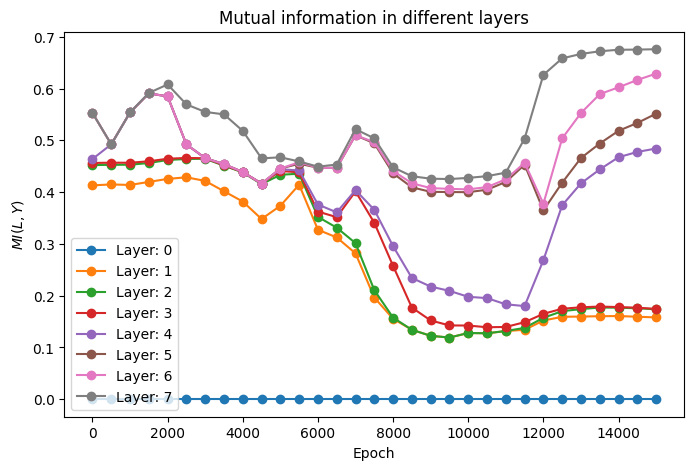

In [37]:
# Plot layer wise data:

fig, ax = plt.subplots(figsize=(8,5))
for layer, data in layer_wise_data.items():
    ax.plot(epochs, data, "-o", label=f"Layer: {layer}")
ax.set_title("Mutual information in different layers")
ax.set_xlabel("Epoch")
ax.set_ylabel(r"$MI(L,Y)$")
plt.legend()
plt.savefig("../figures/MI_test_all_epochs.png")
plt.show()